Python version used: **3.9.13**

Imports:

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import csv
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
from gensim import utils
from gensim.test.utils import datapath

Check that CUDA is available (when using my own system):

In [2]:
torch.cuda.is_available()

True

# Q1:

(a)

In [3]:
with open("PADL-Q1.csv") as q1_file:
  q1_data = []
  q1_dataset = csv.reader(q1_file, delimiter=',')
  for row in q1_dataset:
    if row[0] != 'x1':
      q1_data.append(row)

In [4]:
pca = PCA(n_components=5)
pca.fit(q1_data)
newData = pca.fit_transform(q1_data)
pca_var_percentage = pca.explained_variance_ratio_
print(pca_var_percentage)

[0.53846279 0.30067823 0.1026325  0.04605826 0.01216823]


In [5]:
three_dims = pca_var_percentage[0]+pca_var_percentage[1]+pca_var_percentage[2]
print("Information retained with 3 variables = %f%%\n"%(three_dims*100.0))
print("Information retained with 4 variables = %f%%"%((three_dims + pca_var_percentage[3])*100.0))

Information retained with 3 variables = 94.177351%

Information retained with 4 variables = 98.783177%


Reducing the dimensionality of the dataset by 1 dimension causes information loss of 1.22%. Reducing it by 2 dimensions (down to 3) causes information loss of 5.82% however it is now possible to plot the dataset on a 3D axis, whereas this is not possible with 4 dimensions. Therefore, D_min = 3.





(b)

In [6]:
pca2 = PCA(n_components=3)
pca2.fit(q1_data)
newData2 = pca2.fit_transform(q1_data)
pca2_components = pca2.components_

In [7]:
i = 1
for line in pca2_components:
    print("PC%i: %f*x1 + %f*x2 + %f*x3 + %f*x4 + %f*x5\n"%(i,line[0],line[1],line[2],line[3],line[4]))
    i+=1

PC1: -0.092819*x1 + 0.025272*x2 + -0.348770*x3 + 0.145083*x4 + -0.920900*x5

PC2: 0.005624*x1 + -0.298705*x2 + -0.114221*x3 + -0.940623*x4 + -0.113695*x5

PC3: 0.112668*x1 + -0.133156*x2 + 0.914203*x3 + -0.023934*x4 + -0.365014*x5



# Q2:

Read data into a Pandas Dataframe:

In [8]:
q2_data = pd.read_csv("PADL-Q2-train.csv")
q2_data

,x,y,z,w,out
0,66.4774,1.6495,0.7613,0.1,-0.0209
1,15.1422,2.2292,0.0050,0.1,0.1281
2,87.9859,2.1449,0.2217,0.1,0.1289
3,79.4979,2.0901,0.0396,0.1,0.1442
4,36.5181,2.0992,0.2040,0.0,-0.0131
...,...,...,...,...,...
75,7.5622,2.2608,0.0785,0.1,0.3158
76,10.7811,2.0351,0.6939,0.1,0.0325
77,57.3595,2.2470,0.3667,0.0,0.0675
78,4.4803,1.6897,0.0544,0.1,0.3627


Split into train and test data:

In [9]:
X = q2_data.drop('out', axis=1)
y = q2_data['out']
# Split 70:10 train:test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.125)

Fit a LR model, compare predicted vs actual values, calculate R2 score:

In [10]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test,y_pred)

for y1,y2 in zip(y_test,y_pred):
    print(f'Predicted vs actual: {y2:.4f} vs {y1}')

print(f'\nR2 score: {r2:.6f}')

Predicted vs actual: 0.0873 vs 0.1615
Predicted vs actual: 0.0547 vs -0.0855
Predicted vs actual: 0.0944 vs 0.1442
Predicted vs actual: -0.0096 vs -0.01
Predicted vs actual: 0.0275 vs -0.0876
Predicted vs actual: 0.0325 vs 0.148
Predicted vs actual: -0.0469 vs -0.1797
Predicted vs actual: -0.0339 vs 0.068
Predicted vs actual: -0.0434 vs -0.3139
Predicted vs actual: -0.0326 vs 0.1666

R2 score: 0.210358


# Q3:

(a)

In [11]:
with open("PADL-Q3.txt",'r') as q3_file:
    words = []
    raw_data = q3_file
    for line in q3_file:
        for word in line.split():
            words.append(word)

The following tile removes punctuation from the text then selects all triplets where the middle word is "and". It then selects the before and after words and adds them as a 3-tuple into a list.

In [12]:
punctuation = """!'()*+,— -./:;<=>?@[\]^_`{|"}~#$%&"""
words_no_punc = [''.join(char for char in word if char not in punctuation) for word in words]
triplets = []
for i in range(1,len(words)-1):
    if words_no_punc[i] == "and":
        triplets.append((words_no_punc[i-1],words_no_punc[i],words_no_punc[i+1]))
triplets

[('States', 'and', 'most'),
 ('cost', 'and', 'with'),
 ('eclipses', 'and', 'predominates'),
 ('emotions', 'and', 'that'),
 ('reasoning', 'and', 'observing'),
 ('gibe', 'and', 'a'),
 ('motives', 'and', 'actions'),
 ('delicate', 'and', 'finely'),
 ('him', 'and', 'that'),
 ('dubious', 'and', 'questionable'),
 ('happiness', 'and', 'the'),
 ('books', 'and', 'alternating'),
 ('cocaine', 'and', 'ambition'),
 ('drug', 'and', 'the'),
 ('crime', 'and', 'occupied'),
 ('faculties', 'and', 'extraordinary'),
 ('clues', 'and', 'clearing'),
 ('Trincomalee', 'and', 'finally'),
 ('delicately', 'and', 'successfully'),
 ('friend', 'and', 'companion'),
 ('wooing', 'and', 'with'),
 ('again', 'and', 'to'),
 ('lit', 'and', 'even'),
 ('chest', 'and', 'his'),
 ('mood', 'and', 'habit'),
 ('attitude', 'and', 'manner'),
 ('dreams', 'and', 'was'),
 ('bell', 'and', 'was'),
 ('cigars', 'and', 'indicated'),
 ('case', 'and', 'a'),
 ('fire', 'and', 'looked'),
 ('seven', 'and', 'a'),
 ('lately', 'and', 'that'),
 ('clumsy

(b)

This procedure iterates over all words in L and finds any triplet where the last 3 letters of the final word of the triplet are the same 3 letters as the last 3 letters of word W chosen from L.

In [13]:
L = ['gold','diamond','robbery','bank','police']
matches = []
for W in L:
    for t in triplets:
        if t[2][-3:] == W[-3:]:
            matches.append((' '.join(t),W))

matches

[('away and told', 'gold'),
 ('rapidly and told', 'gold'),
 ('Silk and Gold', 'gold'),
 ('indemnify and hold', 'gold'),
 ('delicacy and every', 'robbery'),
 ('pay and very', 'robbery'),
 ('ten and every', 'robbery'),
 ('Abbots and Archery', 'robbery'),
 ('police and every', 'robbery'),
 ('Air and scenery', 'robbery'),
 ('long and very', 'robbery'),
 ('armchair and cheery', 'robbery'),
 ('police and very', 'robbery'),
 ('do and Frank', 'bank'),
 ('mercifully and thank', 'bank'),
 ('help and advice', 'police')]

(c)

# TODO:

Come back to this and get it to work

In [243]:
with open("PADL-Q3.txt") as q3_dataset:
    dataset = []
    for line in q3_dataset:
        dataset.append(utils.simple_preprocess(line))
for i in range(len(dataset)-1):
    if dataset[i] == []:
        dataset[i] = dataset[i-1] + dataset[i+1]

In [204]:
class Q3Data:
    def __init__(self,dir):
        self.dir = dir
    def __iter__(self):
        with open(self.dir) as q3_dataset:
            for line in q3_dataset:
                if line != '\n':
                    yield utils.simple_preprocess(line)

In [205]:
raw_data = open("PADL-Q3.txt")
raw_data = raw_data.read().splitlines()
sentences = Q3Data("PADL-Q3.txt")
model = Word2Vec()

In [206]:
model.build_vocab(sentences)
model.train(sentences,total_examples=model.corpus_count,epochs=10)

(609978, 1094790)

In [207]:
model.wv.index_to_key[:10]

['the', 'and', 'of', 'to', 'a', 'I', 'in', 'that', 'was', 'his']

In [208]:
model.wv.similar_by_key('lamp')

[('threw', 0.9981973767280579),
 ('ran', 0.9977813363075256),
 ('open,', 0.9977414011955261),
 ('slipped', 0.9977303147315979),
 ('fell', 0.9977186918258667),
 ('window,', 0.9975656867027283),
 ('across', 0.997504711151123),
 ('bent', 0.9974974393844604),
 ('forward,', 0.9974319934844971),
 ('hurried', 0.99741530418396)]

# Q4:

Define MLP using Fully Connected and ReLU layers only:

In [15]:
class MultiplyMLP(nn.Module):
    def __init__(self, inputSize, hiddenSize):
        super(MultiplyMLP, self).__init__()
        self.linear1 = nn.Linear(inputSize,hiddenSize)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hiddenSize,1)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Function to generate random training data in the range [-100,100):

In [16]:
def generate_data(low,high,num_samples):
    x1 = np.random.uniform(low,high, num_samples)
    x2 = np.random.uniform(low,high, num_samples)
    y_true = x1 * x2
    data = torch.tensor(np.column_stack((x1, x2))).to(torch.float32)
    labels = torch.tensor(y_true).reshape(-1, 1)
    return data, labels

Run training loop to train on random data:

In [17]:
# Define hyperparameters
input_size = 2
hidden_size = 64
learning_rate = 0.01
num_epochs = 1000
batch_size = 32
num_samples = 3000
# Use L1Loss for absolute error
criterion = nn.L1Loss()

q4_model = MultiplyMLP(input_size,hidden_size)
optimiser = optim.Adam(q4_model.parameters(), lr=learning_rate)

# Create list to store loss values in for plotting
losses = []

for epoch in range(num_epochs):
    for i in range(0,num_samples,batch_size):
        data,labels = generate_data(-100,100,batch_size)

        output = q4_model(data)
        loss = criterion(output, labels)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    if (epoch+1) % 250 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    if (epoch+1) % 10 == 0:
        losses.append(loss.item())



Epoch [250/1000], Loss: 627.1599
Epoch [500/1000], Loss: 58.6277
Epoch [750/1000], Loss: 26.6937
Epoch [1000/1000], Loss: 24.4932


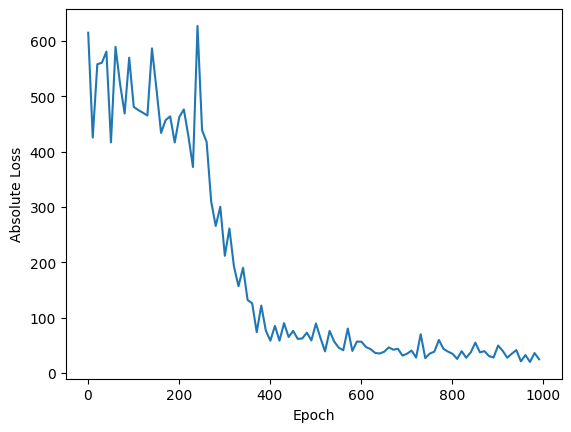

In [18]:
epochs = np.arange(1,1001,10)
plt.xlabel("Epoch")
plt.ylabel("Absolute Loss")
plt.plot(epochs,losses)

Evaluate and compare random example's predicted value vs real value:

In [19]:
x,y = generate_data(-100,100,1)

with torch.no_grad():
    q4_model.eval()
    y_pred = q4_model(x)
l1 = criterion(y_pred,y).item()

print(f'x1, x2 = {x[0][0]:.7f}, {x[0][1]:.7f}')
print(f'Predicted vs Actual value: {y_pred[0][0]} vs {y[0][0]}')
print(f'Test L1 Loss: {l1:.7f}')

x1, x2 = -97.3343201, 84.2313766
Predicted vs Actual value: -8170.90576171875 vs -8198.603655411494
Test L1 Loss: 27.6978937


Generate 100 random samples to test and evaluate average loss within range of training data:

In [20]:
x_val,y_val = generate_data(-100,100,100)
q4_model.eval()

total_loss = 0
for i in range(100):
    with torch.no_grad():
        y_pred = q4_model(x_val[i])
        l1 = criterion(y_pred,y_val[i])
    total_loss+=l1

print(f'Average loss within range of training data = {total_loss/100:.7f}')

Average loss within range of training data = 22.3594613


Generate 100 random samples outside range of training data and calculate average loss:

In [21]:
x_test_neg,y_test_neg = generate_data(-500,-100,50)
x_test_pos,y_test_pos = generate_data(100.01,500,50)

total_loss = 0
for i in range(50):
    with torch.no_grad():
        y_pred = q4_model(x_test_neg[i])
        l1 = criterion(y_pred,y_test_neg[i])
    total_loss+=l1

for i in range(50):
    with torch.no_grad():
        y_pred = q4_model(x_test_pos[i])
        l1 = criterion(y_pred,y_test_pos[i])
    total_loss+=l1

print(f'Average loss outside range of training data = {total_loss/100:.7f}')

Average loss outside range of training data = 56874.2062989


# Q5:

(a)

In [22]:
class ClocksDataset(Dataset):
    """Custom Clocks Dataset"""

    def __init__(self,img_dir):

        self.img_dir = img_dir
        images = []
        labels = []

        for i in range(10000):
            images.append(f"{i:04d}.png")
            labels.append(f"{i:04d}.txt")
        
        self.images = sorted(images)
        self.labels = sorted(labels)

    def __len__(self):
        return len(self.images)

    def __getitem__(self,idx):
        img_path = self.images[idx]
        label_path = self.labels[idx]

        image = (read_image(self.img_dir + img_path)).to(torch.float32)/255.0
        label = self.read_label(self.img_dir + label_path)

        return image,label
    
    def read_label(self,label_path):
        with open(label_path) as label_file:
            raw_label = label_file.read()
        label_vals = raw_label.split(':')
        label_vals = [float(val) for val in label_vals]
        hours = label_vals[0]
        mins = label_vals[1]
        return torch.tensor((hours,mins), dtype=torch.float32)

In [23]:
batch_size = 32
dataset = ClocksDataset("clocks_dataset/train/")
dataloader = DataLoader(dataset, batch_size=batch_size)
train_data,validation_data = torch.utils.data.random_split(dataset,[9600,400])

In [24]:
dataset[0][0].shape

torch.Size([3, 448, 448])

Label value: tensor(0.) , tensor(19.)
Human readable: 0:19


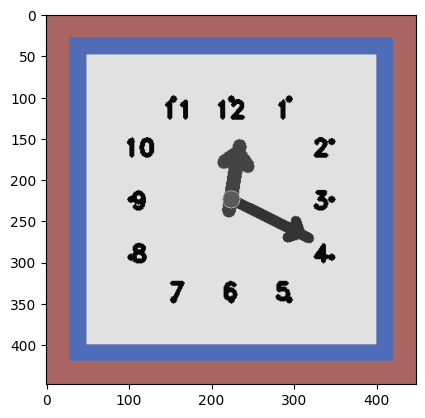

In [25]:
random_img = np.random.randint(0,8999)
print("Label value:",train_data[random_img][1][0],',',train_data[random_img][1][1])
print("Human readable:",str(int(train_data[random_img][1][0].item()))+':'+str(int(train_data[random_img][1][1].item())))
plt.imshow(train_data[random_img][0].permute(1,2,0))

In [26]:
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(validation_data,batch_size=batch_size,shuffle=True)

images,labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 448, 448])
torch.Size([32, 2])


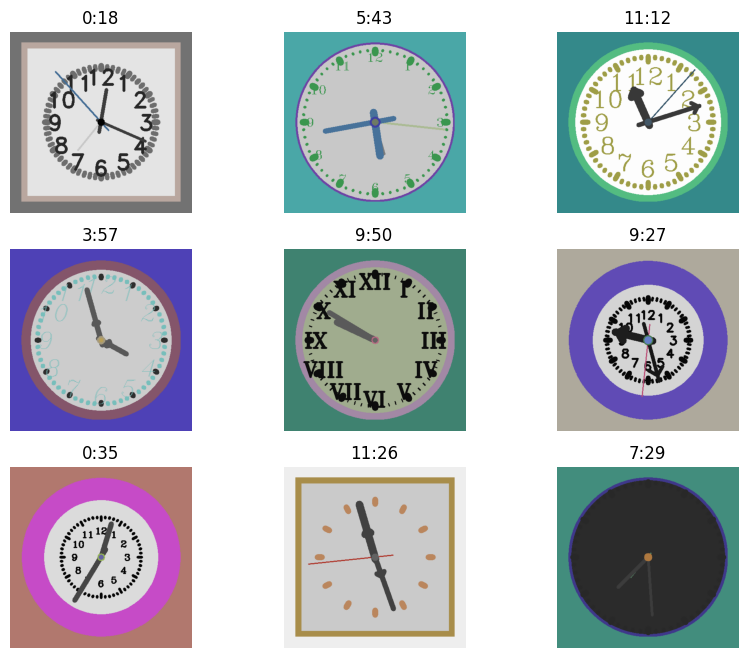

In [27]:
images, labels = next(iter(train_loader))

figure = plt.figure(figsize=(10, 8))
cols, rows = 3, 3
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.title((str(int(labels[i][0].item()))+':'+str(int(labels[i][1].item()))))
    plt.axis("off")
    plt.imshow(images[i,:].permute(1,2,0))
plt.show()

(b)

class ClocksCNN(nn.Module):
    def __init__(self):
        super(ClocksCNN,self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 8 x 224 x 224
            nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(16),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 16 x 112 x 112
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 32 x 56 x 56
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 64 x 28 x 28
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 128 x 14 x 14
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 256 x 6 x 6
            nn.Flatten())
        
        self.MLPhours = nn.Sequential(
            nn.Linear(in_features=256*6*6,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=12)
        )

        self.MLPmins = nn.Sequential(
            nn.Linear(in_features=256*6*6,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=1),
            nn.Sigmoid()
        )

    def forward(self,x):
        x = self.layers(x)
        hours = self.MLPhours(x)
        mins = self.MLPmins(x)
        mins = mins*60
        return hours,mins

q5_model = ClocksCNN()

In [28]:
class ClocksCNN(nn.Module):
    def __init__(self):
        super(ClocksCNN,self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 8 x 224 x 224
            nn.Conv2d(in_channels=8,out_channels=32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2), # 32 x 112 x 112
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=4), # 64 x 28 x 28
            nn.Flatten())
        
        self.MLPhours = nn.Sequential(
            nn.Linear(in_features=64*28*28,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=12)
        )

        self.MLPmins = nn.Sequential(
            nn.Linear(in_features=64*28*28,out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128,out_features=1),
            nn.Sigmoid()
        )

    def forward(self,x):
        h = self.layers(x)
        m = self.layers(x)
        hours = self.MLPmins(h)
        hours = hours*12*60
        mins = self.MLPmins(m)
        mins = mins*60
        return hours,mins

q5_model = ClocksCNN()

In [29]:
total_params = sum(p.numel() for p in q5_model.parameters() if p.requires_grad)
print(total_params)

12868253


(c)

In [30]:
# TODO: Justify the chosen loss function(s)
criterion_q5_h = nn.L1Loss()
criterion_q5_m = nn.L1Loss()

In [31]:
device = torch.device("cpu")

q5_model = q5_model.to(device)
q5_model.eval()
images, labels = next(iter(train_loader))
pred_h_test,pred_m_test = q5_model(images)
print(pred_h_test.shape)
print(pred_m_test.shape)
print(labels.shape)

torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 2])


In [32]:
loss_hours = criterion_q5_h(pred_h_test[:,0],labels[:,0]*60)
loss_mins = criterion_q5_m(pred_m_test[:,0],labels[:,1])
loss = loss_hours + loss_mins
print("Prediction:",pred_h_test[:,0],pred_m_test[:,0])
print("Actual:",labels[:,0]*60,labels[:,1])
print(loss_hours,loss_mins)
print("Loss =", loss)

Prediction: tensor([344.9514, 346.1765, 344.8689, 347.1985, 345.8686, 345.0494, 347.2904,
        346.5016, 345.4388, 343.9614, 346.9029, 347.8612, 347.3884, 345.6736,
        345.0411, 346.2670, 345.8851, 347.1543, 347.4867, 346.5083, 346.0728,
        347.2085, 345.7749, 346.6119, 344.6186, 346.2781, 346.1107, 346.4722,
        345.7516, 345.5222, 346.1021, 347.5615], grad_fn=<SelectBackward0>) tensor([28.7459, 28.8480, 28.7391, 28.9332, 28.8224, 28.7541, 28.9409, 28.8751,
        28.7866, 28.6634, 28.9086, 28.9884, 28.9490, 28.8061, 28.7534, 28.8556,
        28.8238, 28.9295, 28.9572, 28.8757, 28.8394, 28.9340, 28.8146, 28.8843,
        28.7182, 28.8565, 28.8426, 28.8727, 28.8126, 28.7935, 28.8418, 28.9635],
       grad_fn=<SelectBackward0>)
Actual: tensor([360., 240., 420., 300., 660., 420., 300., 540., 600., 120., 240., 120.,
        660., 600., 480., 120., 540., 540., 480., 420., 120.,   0.,   0., 240.,
        540., 420., 300., 480., 120., 660.,   0., 240.]) tensor([ 7., 24.,  8

In [33]:
def time_diff(pred_h,pred_m,label):
    output = 0
    for i in range(batch_size):

        mins1 = pred_h[i].item() + pred_m[i].item()
        mins2 = label[i][0].item()*60 + label[i][1].item()
        diff = np.abs(mins1-mins2)

        output += np.min([diff,720-diff])
    return torch.tensor(output,dtype=torch.float32,requires_grad=True)

In [34]:
time_diff(pred_h_test[:,0],pred_m_test[:,0],labels)

tensor(5604.5513, requires_grad=True)

Training loop:

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

q5_model = q5_model.to(device)
q5_model.train()

num_epochs = 25
optim = torch.optim.Adam(q5_model.parameters(), lr=0.00001)
iterations_per_epoch = len(train_loader)

losses_q5 = []

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images,labels = images.to(device), labels.to(device)
        pred_h,pred_m = q5_model(images)
        loss = time_diff(pred_h,pred_m,labels)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if (i+1)%10 == 0:
            print('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, iterations_per_epoch, loss.item()))
        if (i+1) % 50 == 0:
            losses_q5.append(loss.item())
    


Epoch [1/25], Iteration [10/300], Loss: 6382.0981
Epoch [1/25], Iteration [20/300], Loss: 5828.7954
Epoch [1/25], Iteration [30/300], Loss: 5969.0996
Epoch [1/25], Iteration [40/300], Loss: 5411.8193
Epoch [1/25], Iteration [50/300], Loss: 6038.7778
Epoch [1/25], Iteration [60/300], Loss: 4577.6724
Epoch [1/25], Iteration [70/300], Loss: 5228.2974
Epoch [1/25], Iteration [80/300], Loss: 5279.8848
Epoch [1/25], Iteration [90/300], Loss: 6681.1313
Epoch [1/25], Iteration [100/300], Loss: 6124.6001
Epoch [1/25], Iteration [110/300], Loss: 5870.3330
Epoch [1/25], Iteration [120/300], Loss: 6573.8716
Epoch [1/25], Iteration [130/300], Loss: 4717.2568
Epoch [1/25], Iteration [140/300], Loss: 5307.3745
Epoch [1/25], Iteration [150/300], Loss: 5642.5532
Epoch [1/25], Iteration [160/300], Loss: 5530.5898
Epoch [1/25], Iteration [170/300], Loss: 6215.3545
Epoch [1/25], Iteration [180/300], Loss: 5426.8198
Epoch [1/25], Iteration [190/300], Loss: 6372.5112
Epoch [1/25], Iteration [200/300], Loss:

KeyboardInterrupt: 

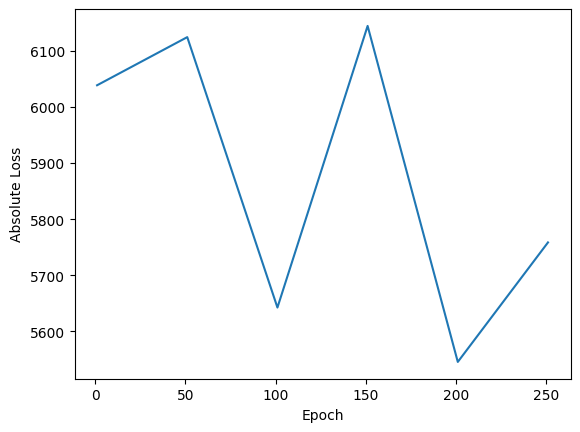

In [43]:
epochs = np.arange(1,301,50)
plt.xlabel("Epoch")
plt.ylabel("Absolute Loss")
plt.plot(epochs,losses_q5)

Test on a random image from validation set:

In [ ]:
device = torch.device("cpu")
q5_model = q5_model.to(device)
q5_model.eval()
images_v, labels_v = next(iter(valid_loader))

pred_h_valid,pred_m_valid = q5_model(images_v)

loss_hours_v = criterion_q5_h(pred_h_valid[0].argmax(),labels_v[:,0][0])
loss_mins_v = criterion_q5_m(pred_m_valid[:,0][0],labels_v[:,1][0])
loss_v = loss_hours_v + loss_mins_v
print("Prediction:",pred_h_valid[0].argmax(),pred_m_valid[0])
print("Actual:",labels_v[:,0][0],labels_v[:,1][0])
print(loss_hours_v,loss_mins_v)
print("Loss =", loss_v)

Prediction: tensor(4) tensor([37.4431], grad_fn=<SelectBackward0>)
Actual: tensor(9.) tensor(37.)
tensor(5.) tensor(0.4431, grad_fn=<MeanBackward0>)
Loss = tensor(5.4431, grad_fn=<AddBackward0>)


This is minimising the minutes but not hours! It doesn't weight the hours very highly.

Convert it all to minutes and try again!